# 1.7 Task

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pyvis.network import Network
import pyvis

In [2]:
# Load dataset
relationship_df = pd.read_csv("country_relationships.csv")

In [3]:
relationship_df

,source,target,value
0,united kingdom,france,4
1,united kingdom,germany,3
2,france,italy,2
3,germany,russia,5
4,russia,china,4
5,china,japan,3
6,japan,australia,2
7,australia,india,5
8,india,south africa,2
9,south africa,egypt,3


In [4]:
# Create graph
G = nx.from_pandas_edgelist(relationship_df, 
                            source="source", 
                            target="target", 
                            edge_attr="value", 
                            create_using=nx.Graph())

#### Graph visualization - Networkx

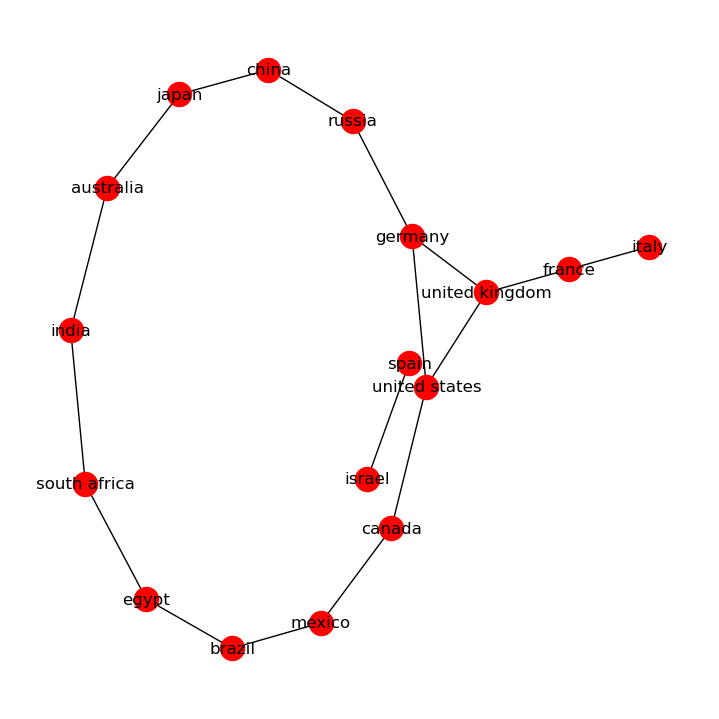

In [8]:
# Draw graph
h = plt.figure(figsize = (7,7))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels = True, node_color = 'red', edge_cmap = plt.cm.Blues, pos = pos)
plt.show()

In [9]:
h.savefig('networkx_plt_alice.png')

### Graph visualization - Pyvis

In [10]:
# Define net object

net = Network()
net = Network(notebook = True,width="900px", height="800px", bgcolor='#222222', font_color='white')

# Define nodes from the G object
node_degree = dict(G.degree)

# Setting up node size attributes
nx.set_node_attributes(G, node_degree, 'size')
net.from_nx(G)
net.show_buttons(filter_ = True)
net.repulsion()
net.show("alice.html")

alice.html


### Community detection - Leiden algorithm

In [11]:
!pip install cdlib

In [12]:
!pip install igraph leidenalg

In [13]:
from cdlib import algorithms

coms = algorithms.leiden(G)

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer', 'graph_tool', 'bayanpy'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'wurlitzer'}


In [14]:
type(coms)

cdlib.classes.node_clustering.NodeClustering

In [15]:
new_com = coms.to_node_community_map()

In [16]:
new_com

defaultdict(list,
            {'russia': [0],
             'china': [0],
             'japan': [0],
             'australia': [0],
             'india': [0],
             'united kingdom': [1],
             'france': [1],
             'germany': [1],
             'italy': [1],
             'united states': [1],
             'south africa': [2],
             'egypt': [2],
             'brazil': [2],
             'mexico': [2],
             'canada': [2],
             'israel': [3],
             'spain': [3]})

In [17]:
# Put the output from new_com into a dictionary

dict_com = {k:v[0] for k,v in new_com.items()}

In [18]:
dict_com

{'russia': 0,
 'china': 0,
 'japan': 0,
 'australia': 0,
 'india': 0,
 'united kingdom': 1,
 'france': 1,
 'germany': 1,
 'italy': 1,
 'united states': 1,
 'south africa': 2,
 'egypt': 2,
 'brazil': 2,
 'mexico': 2,
 'canada': 2,
 'israel': 3,
 'spain': 3}

In [19]:
# Rerun network graph with the communities as an argument

nx.set_node_attributes(G, dict_com, 'group')
com_net = Network(notebook = True, width="1300px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show_buttons(filter_ = True)
com_net.repulsion()
com_net.show("alice_communities_leiden.html")

alice_communities_leiden.html


### The most important countries in Alice in Wonderland

In [20]:
# Degree centrality

degree_dict = nx.degree_centrality(G)
degree_dict

{'united kingdom': 0.1875,
 'france': 0.125,
 'germany': 0.1875,
 'italy': 0.0625,
 'russia': 0.125,
 'china': 0.125,
 'japan': 0.125,
 'australia': 0.125,
 'india': 0.125,
 'south africa': 0.125,
 'egypt': 0.125,
 'brazil': 0.125,
 'mexico': 0.125,
 'canada': 0.125,
 'united states': 0.1875,
 'israel': 0.0625,
 'spain': 0.0625}

In [24]:
# Create a DataFrame from the degree centrality dictionary
degree_df = pd.DataFrame(degree_dict.items(), columns=['countries', 'centrality'])

In [25]:
# Sort the DataFrame by centrality values in descending order
degree_df.sort_values(by='centrality', ascending=False, inplace=True)

In [28]:
# Plot the degree centrality using Seaborn
plt.figure(figsize=(10, 4))
sns.set_palette(sns.dark_palette("xkcd:blue", 22))  # Set the color palette properly

<Figure size 1000x400 with 0 Axes>

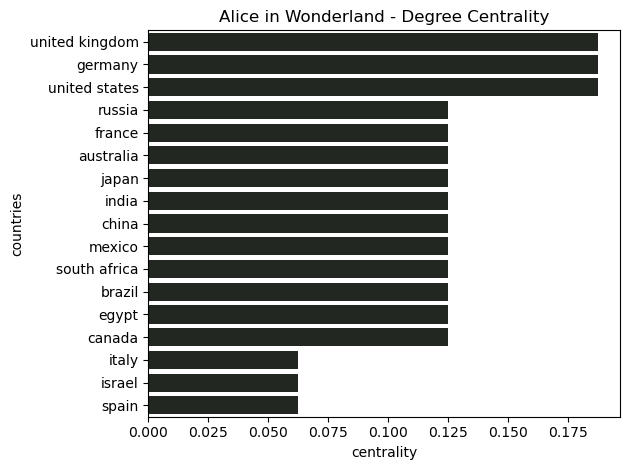

In [29]:
sns.barplot(
    x='centrality',
    y='countries',
    data=degree_df,
    saturation=0.9
).set_title("Alice in Wonderland - Degree Centrality")

plt.tight_layout()
plt.show()

In [30]:
# Calculate closeness centrality
closeness_dict = nx.closeness_centrality(G)

In [31]:
# Create a DataFrame
closeness_df = pd.DataFrame(closeness_dict.items(), columns=['characters', 'centrality'])

In [32]:
# Sort by centrality
closeness_df.sort_values(by='centrality', ascending=False, inplace=True)

In [33]:
# Set figure size
plt.figure(figsize=(10, 4))

# Set the color palette properly
sns.set_palette(sns.dark_palette("xkcd:blue", 22))

<Figure size 1000x400 with 0 Axes>

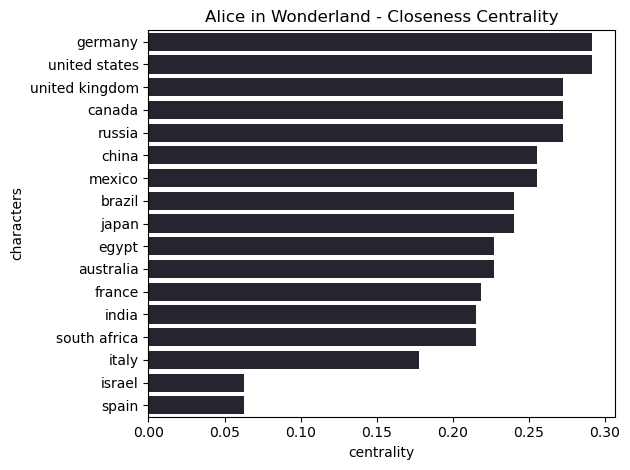

In [34]:
# Plot the closeness centrality
sns.barplot(
    x='centrality',
    y='characters',
    data=closeness_df,
    saturation=0.9
).set_title("Alice in Wonderland - Closeness Centrality")

plt.tight_layout()
plt.show()

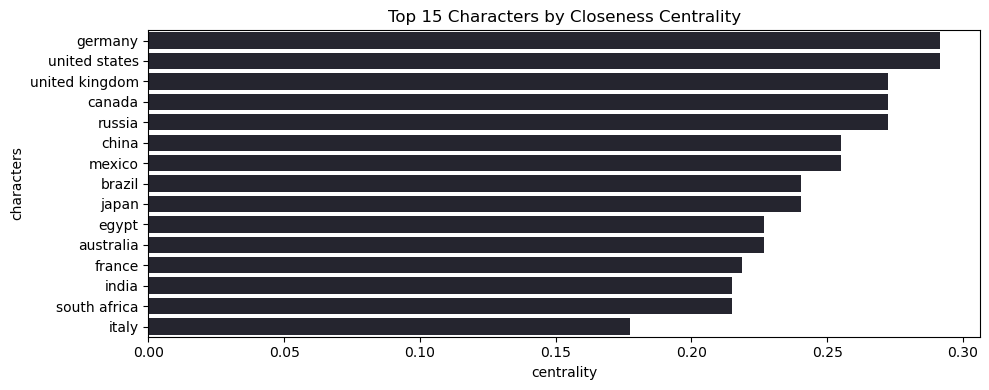

In [35]:
top_15 = closeness_df.head(15)

plt.figure(figsize=(10, 4))
sns.set_palette(sns.dark_palette("xkcd:blue", 15))
sns.barplot(x='centrality', y='characters', data=top_15, saturation=0.9) \
    .set_title("Top 15 Characters by Closeness Centrality")
plt.tight_layout()
plt.show()


In [36]:
# Calculate betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)


In [37]:
# Create a DataFrame
betweenness_df = pd.DataFrame(betweenness_dict.items(), columns=['characters', 'centrality'])

In [38]:
# Sort by centrality
betweenness_df.sort_values(by='centrality', ascending=False, inplace=True)

In [39]:
# Set figure size
plt.figure(figsize=(10, 4))

# Set the dark blue color palette
sns.set_palette(sns.dark_palette("xkcd:blue", 22))

<Figure size 1000x400 with 0 Axes>

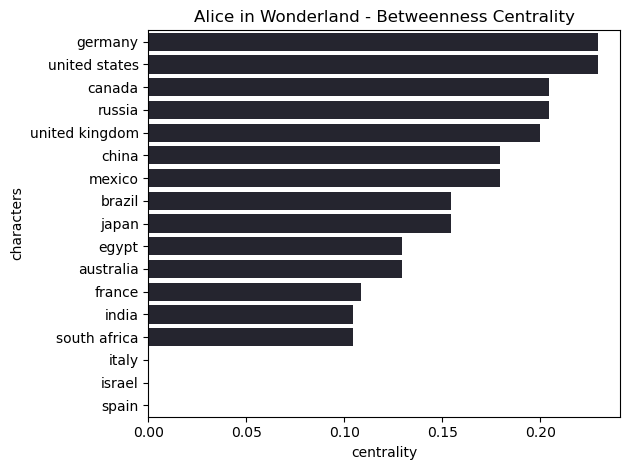

In [40]:
# Plot the betweenness centrality
sns.barplot(
    x='centrality',
    y='characters',
    data=betweenness_df,
    saturation=0.9
).set_title("Alice in Wonderland - Betweenness Centrality")

plt.tight_layout()
plt.show()

In [41]:
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')
